In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
laptop = pd.read_csv(r"C:\Users\HARRY\Documents\Data Analyst Projects\laptop price predictor\laptop_data.csv")

# EDA

In [3]:
laptop

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [4]:
laptop.drop(columns=["Unnamed: 0"],inplace=True)

In [5]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [6]:
laptop["Ram"]=laptop["Ram"].str.replace("GB","")

In [7]:
laptop["Weight"]=laptop["Weight"].str.replace("kg","")

In [8]:
laptop["Weight"]=laptop["Weight"].astype('float32')
laptop["Ram"]=laptop["Ram"].astype('int32')

In [9]:
laptop

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200


# Visualization

C:\Users\HARRY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

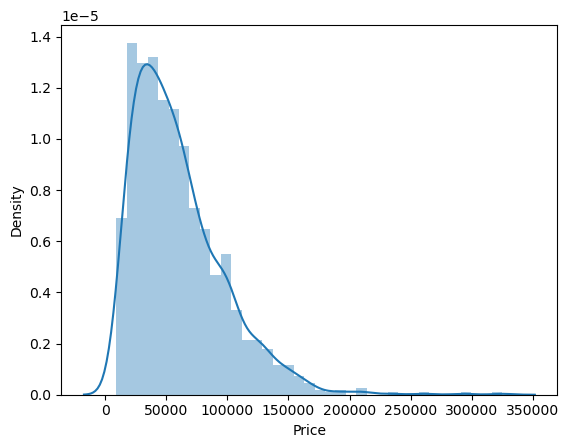

In [10]:
sns.distplot(laptop["Price"])

<AxesSubplot:>

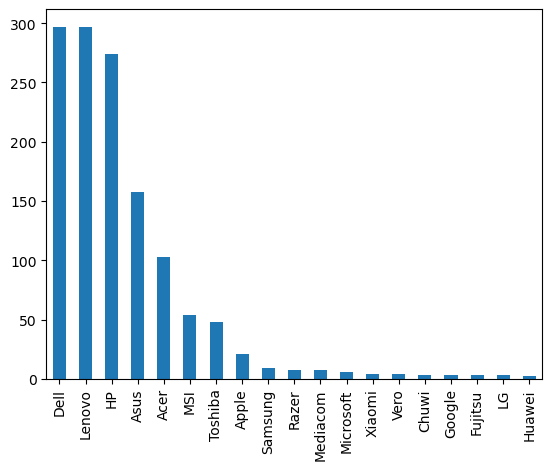

In [11]:
laptop['Company'].value_counts().plot(kind='bar')

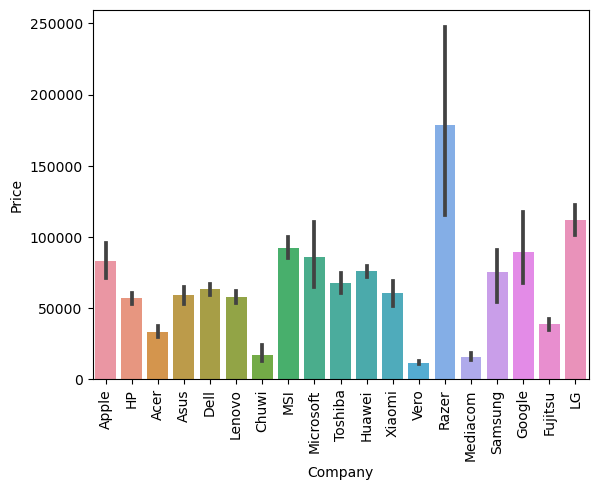

In [12]:
sns.barplot(x=laptop['Company'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

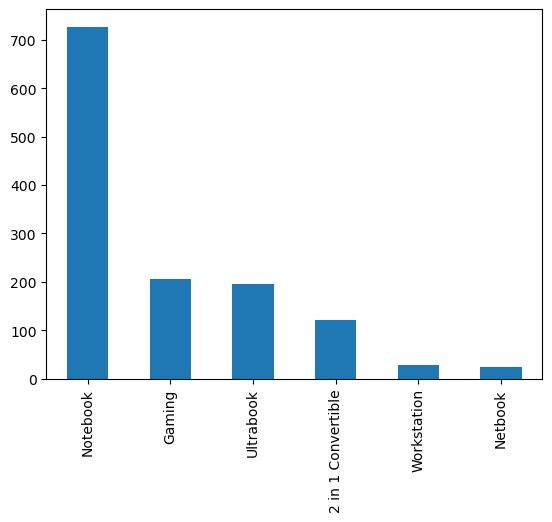

In [13]:
laptop['TypeName'].value_counts().plot(kind='bar')

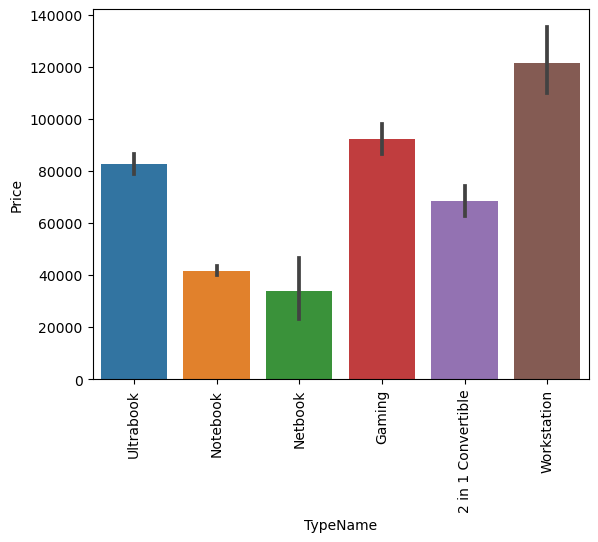

In [14]:
sns.barplot(x=laptop['TypeName'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\HARRY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

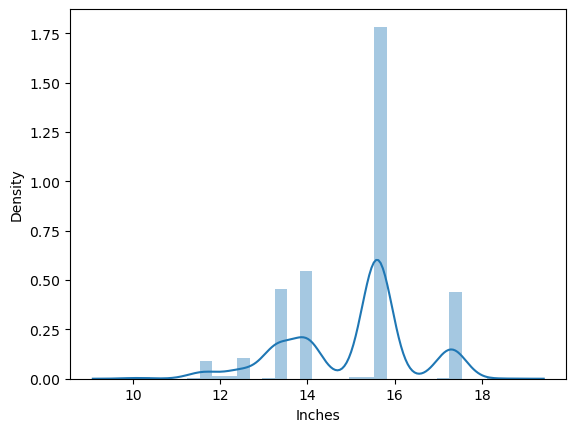

In [15]:
sns.distplot(laptop['Inches'])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

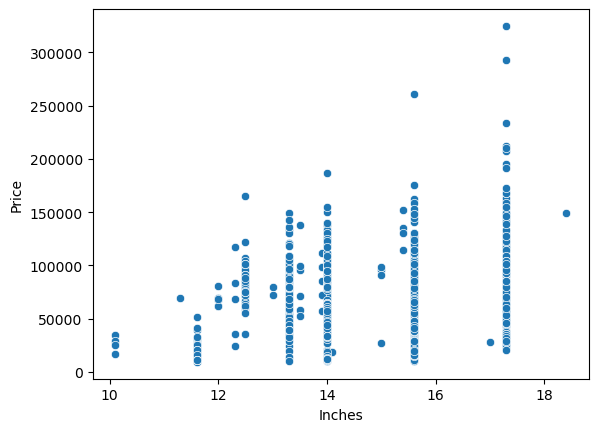

In [16]:
sns.scatterplot(x=laptop['Inches'],y=laptop['Price'])

In [17]:
laptop['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [18]:
laptop['Touchscreen'] = laptop['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0 )

In [19]:
laptop["Touchscreen"].value_counts()

0    1111
1     192
Name: Touchscreen, dtype: int64

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

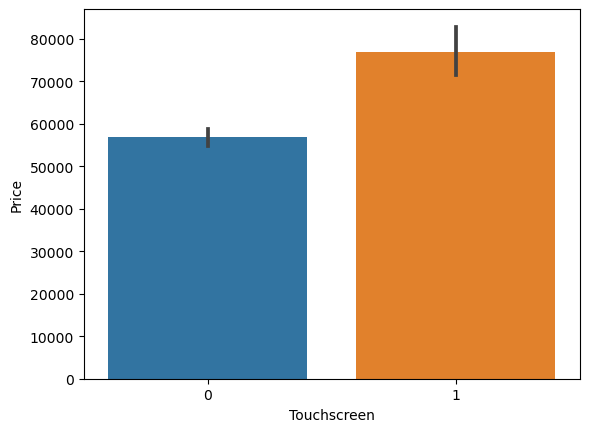

In [20]:
sns.barplot(x=laptop['Touchscreen'],y=laptop['Price'])

In [21]:
laptop['IPS'] = laptop['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0 )

In [22]:
laptop["IPS"].value_counts()

0    938
1    365
Name: IPS, dtype: int64

<AxesSubplot:xlabel='IPS', ylabel='Price'>

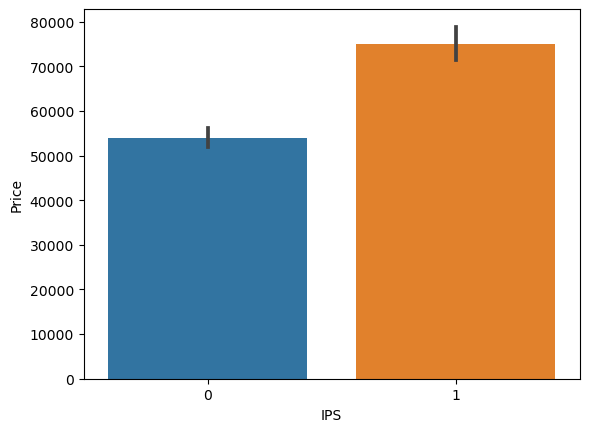

In [23]:
sns.barplot(x=laptop['IPS'],y=laptop['Price'])

In [24]:
new = laptop['ScreenResolution'].str.split('x',n=1,expand=True)

In [25]:
laptop['X_res'] = new[0]
laptop['Y_res'] = new[1]

In [26]:
laptop.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
990,HP,Netbook,12.5,Full HD 1920x1080,Intel Core M 6Y75 1.2GHz,8,512GB SSD,Intel HD Graphics 515,Windows 10,0.97,101658.240,0,0,Full HD 1920,1080
780,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,32,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070M,Windows 10,4.42,191211.264,0,1,IPS Panel Full HD 1920,1080
464,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,8,256GB SSD,Nvidia Quadro M2200M,Windows 10,2.67,111355.200,0,0,Full HD 1920,1080
730,Acer,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.20,103096.800,0,1,IPS Panel Full HD 1920,1080
683,HP,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256GB SSD,AMD Radeon R5 520,Windows 10,2.50,37242.720,0,1,IPS Panel Full HD 1920,1080


In [27]:
laptop['X_res'] = laptop['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [28]:
laptop

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768


In [29]:
laptop['X_res'] = laptop['X_res'].astype('int')
laptop['Y_res'] = laptop['Y_res'].astype('int')

In [30]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [31]:
laptop.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [32]:
laptop['ppi'] = (((laptop['X_res']**2) + (laptop['Y_res']**2))**0.5/laptop['Inches']).astype('float')

In [33]:
laptop.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [34]:
laptop.drop(columns = ['ScreenResolution'],inplace=True)

In [35]:
laptop

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080,157.350512
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800,276.053530
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768,111.935204
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768,100.454670


In [36]:
laptop.drop(columns = ['Inches','X_res','Y_res'],inplace=True)

In [37]:
laptop.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [38]:
laptop['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [39]:
laptop['Gpu brand'] = laptop['Gpu'].apply(lambda x:x.split()[0])

In [40]:
laptop.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Gpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,AMD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel


In [41]:
laptop['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [42]:
laptop = laptop [laptop ['Gpu brand'] != 'ARM']

In [43]:
laptop['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

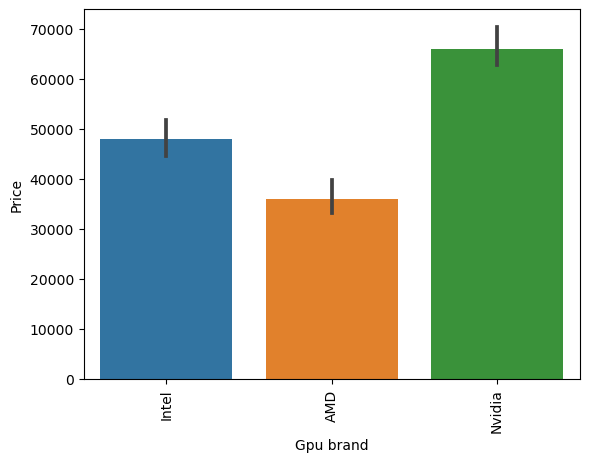

In [44]:
sns.barplot(x=laptop['Gpu brand'],y=laptop['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [45]:
laptop.drop(columns=['Gpu'],inplace=True)

C:\Users\HARRY\AppData\Local\Temp\ipykernel_20184\2335623913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop.drop(columns=['Gpu'],inplace=True)


In [46]:
laptop.head()

,Company,TypeName,Cpu,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,ppi,Gpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,macOS,1.37,71378.6832,0,1,226.983005,Intel
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,macOS,1.34,47895.5232,0,0,127.677940,Intel
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,No OS,1.86,30636.0000,0,0,141.211998,Intel
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,macOS,1.83,135195.3360,0,1,220.534624,AMD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,macOS,1.37,96095.8080,0,1,226.983005,Intel


In [47]:
laptop['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

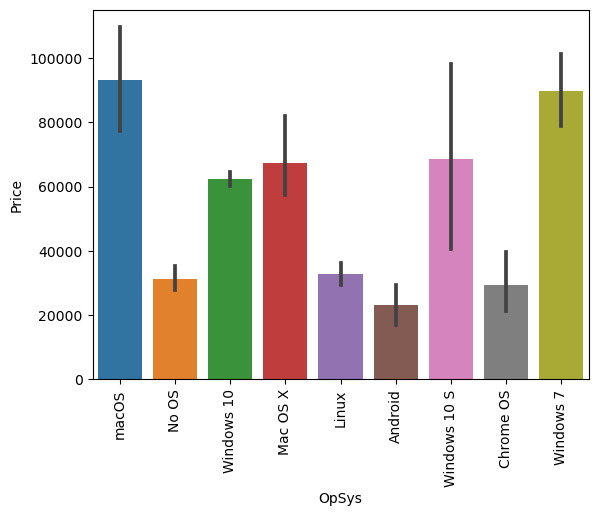

In [48]:
sns.barplot(x=laptop['OpSys'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [49]:
laptop

,Company,TypeName,Cpu,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,ppi,Gpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,macOS,1.37,71378.6832,0,1,226.983005,Intel
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,macOS,1.34,47895.5232,0,0,127.677940,Intel
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,No OS,1.86,30636.0000,0,0,141.211998,Intel
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,macOS,1.83,135195.3360,0,1,220.534624,AMD
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,macOS,1.37,96095.8080,0,1,226.983005,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Windows 10,1.80,33992.6400,1,1,157.350512,Intel
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Windows 10,1.30,79866.7200,1,1,276.053530,Intel
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Windows 10,1.50,12201.1200,0,0,111.935204,Intel
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,Windows 10,2.19,40705.9200,0,0,100.454670,AMD


In [50]:
laptop['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i5 2.9GHz               1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v5 2.9GHz      1
Name: Cpu, Length: 117, dtype: int64

In [51]:
laptop['Cpu Name'] = laptop['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

C:\Users\HARRY\AppData\Local\Temp\ipykernel_20184\2994710940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop['Cpu Name'] = laptop['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))


In [52]:
laptop.head()

,Company,TypeName,Cpu,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,ppi,Gpu brand,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,macOS,1.37,71378.6832,0,1,226.983005,Intel,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,macOS,1.34,47895.5232,0,0,127.677940,Intel,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,No OS,1.86,30636.0000,0,0,141.211998,Intel,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,macOS,1.83,135195.3360,0,1,220.534624,AMD,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,macOS,1.37,96095.8080,0,1,226.983005,Intel,Intel Core i5


In [53]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [54]:
laptop['Cpu brand'] = laptop['Cpu Name'].apply(fetch_processor)

C:\Users\HARRY\AppData\Local\Temp\ipykernel_20184\3741462560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop['Cpu brand'] = laptop['Cpu Name'].apply(fetch_processor)


In [55]:
laptop.head()

,Company,TypeName,Cpu,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,ppi,Gpu brand,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,macOS,1.37,71378.6832,0,1,226.983005,Intel,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,macOS,1.34,47895.5232,0,0,127.677940,Intel,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,No OS,1.86,30636.0000,0,0,141.211998,Intel,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,macOS,1.83,135195.3360,0,1,220.534624,AMD,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,macOS,1.37,96095.8080,0,1,226.983005,Intel,Intel Core i5,Intel Core i5


<AxesSubplot:>

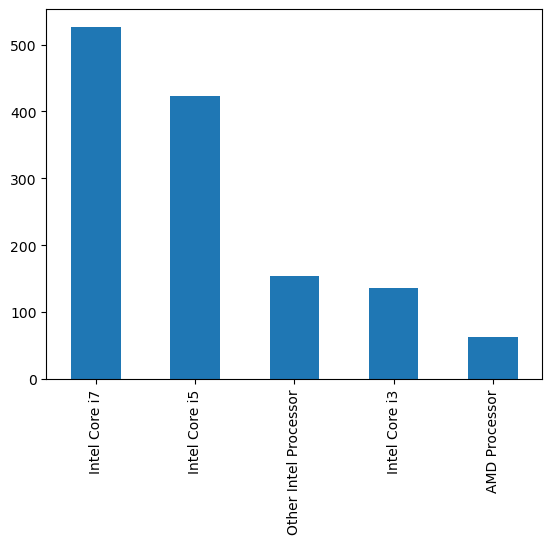

In [56]:
laptop['Cpu brand'].value_counts().plot(kind='bar')

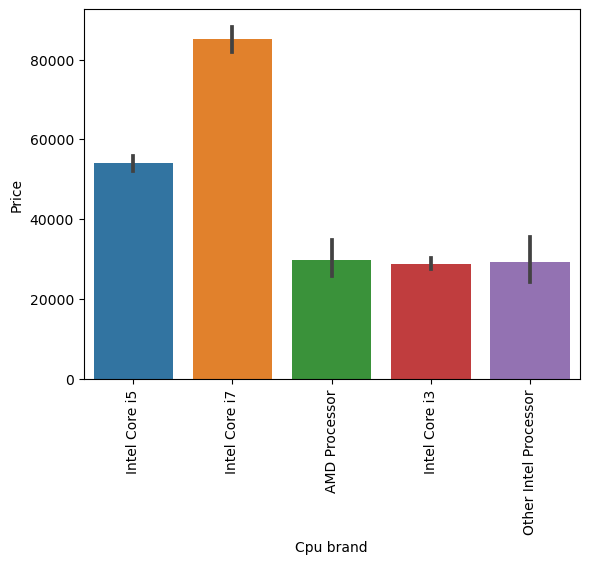

In [57]:
sns.barplot(x=laptop['Cpu brand'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [58]:
laptop.drop(columns=['Cpu','Cpu Name'],inplace=True)

C:\Users\HARRY\AppData\Local\Temp\ipykernel_20184\179910970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop.drop(columns=['Cpu','Cpu Name'],inplace=True)


In [59]:
laptop.head()

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,ppi,Gpu brand,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,macOS,1.37,71378.6832,0,1,226.983005,Intel,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,macOS,1.34,47895.5232,0,0,127.677940,Intel,Intel Core i5
2,HP,Notebook,8,256GB SSD,No OS,1.86,30636.0000,0,0,141.211998,Intel,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,macOS,1.83,135195.3360,0,1,220.534624,AMD,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,macOS,1.37,96095.8080,0,1,226.983005,Intel,Intel Core i5


<AxesSubplot:>

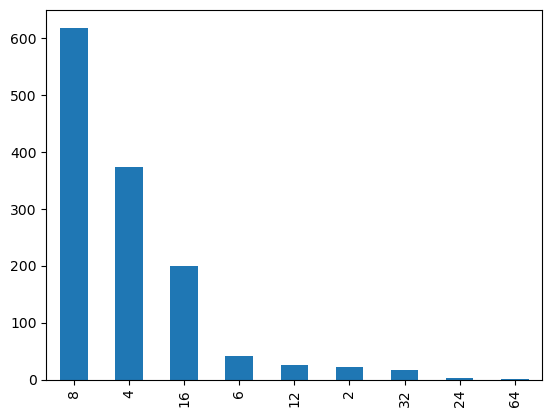

In [60]:
laptop['Ram'].value_counts().plot(kind='bar')

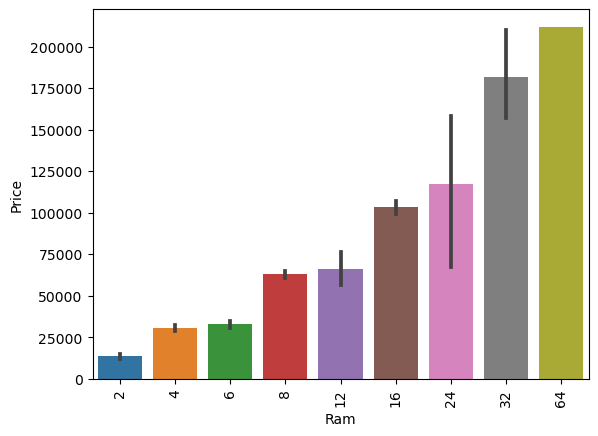

In [61]:
sns.barplot(x=laptop['Ram'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [62]:
laptop['Memory']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1302, dtype: object

In [63]:
laptop['Memory'] = laptop['Memory'].astype(str).replace('\.0', '', regex=True)
laptop["Memory"] = laptop["Memory"].str.replace('GB', '')
laptop["Memory"] = laptop["Memory"].str.replace('TB', '000')
new = laptop["Memory"].str.split("+", n = 1, expand = True)

laptop["first"]= new[0]
laptop["first"]=laptop["first"].str.strip()

laptop["second"]= new[1]

laptop["Layer1HDD"] = laptop["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptop["Layer1SSD"] = laptop["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptop["Layer1Hybrid"] = laptop["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop["Layer1Flash_Storage"] = laptop["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptop['first'] = laptop['first'].str.replace(r'\D', '')

laptop["second"].fillna("0", inplace = True)

laptop["Layer2HDD"] = laptop["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptop["Layer2SSD"] = laptop["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptop["Layer2Hybrid"] = laptop["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptop["Layer2Flash_Storage"] = laptop["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptop['second'] = laptop['second'].str.replace(r'\D', '')

laptop["first"] =laptop["first"].astype(int)
laptop["second"] = laptop["second"].astype(int)

laptop["HDD"]=(laptop["first"]*laptop["Layer1HDD"]+laptop["second"]*laptop["Layer2HDD"])
laptop["SSD"]=(laptop["first"]*laptop["Layer1SSD"]+laptop["second"]*laptop["Layer2SSD"])
laptop["Hybrid"]=(laptop["first"]*laptop["Layer1Hybrid"]+laptop["second"]*laptop["Layer2Hybrid"])
laptop["Flash_Storage"]=(laptop["first"]*laptop["Layer1Flash_Storage"]+laptop["second"]*laptop["Layer2Flash_Storage"])

laptop.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\HARRY\AppData\Local\Temp\ipykernel_20184\4168627447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop['Memory'] = laptop['Memory'].astype(str).replace('\.0', '', regex=True)
C:\Users\HARRY\AppData\Local\Temp\ipykernel_20184\4168627447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop["Memory"] = laptop["Memory"].str.replace('GB', '')
C:\Users\HARRY\AppData\Local\Temp\ipykernel_20184\4168627447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [64]:
laptop.head()

,Company,TypeName,Ram,Memory,OpSys,Weight,Price,Touchscreen,IPS,ppi,Gpu brand,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,macOS,1.37,71378.6832,0,1,226.983005,Intel,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,macOS,1.34,47895.5232,0,0,127.677940,Intel,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,No OS,1.86,30636.0000,0,0,141.211998,Intel,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,macOS,1.83,135195.3360,0,1,220.534624,AMD,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,macOS,1.37,96095.8080,0,1,226.983005,Intel,Intel Core i5,0,256,0,0


In [65]:
laptop.drop(columns=['Memory'],inplace=True)

C:\Users\HARRY\AppData\Local\Temp\ipykernel_20184\1161211724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop.drop(columns=['Memory'],inplace=True)


In [66]:
laptop.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Gpu brand,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel,Intel Core i5,0,0,0,128
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,AMD,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel,Intel Core i5,0,256,0,0


In [67]:
laptop.corr()['Price']

Ram              0.742905
Weight           0.209867
Price            1.000000
Touchscreen      0.192917
IPS              0.253320
ppi              0.475368
HDD             -0.096891
SSD              0.670660
Hybrid           0.007942
Flash_Storage   -0.040067
Name: Price, dtype: float64

In [68]:
laptop.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

C:\Users\HARRY\AppData\Local\Temp\ipykernel_20184\2946495258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop.drop(columns=['Hybrid','Flash_Storage'],inplace=True)


In [69]:
laptop.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Gpu brand,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel,Intel Core i5,0,128
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel,Intel Core i5,0,0
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel,Intel Core i5,0,256
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,AMD,Intel Core i7,0,512
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel,Intel Core i5,0,256


In [70]:
laptop['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

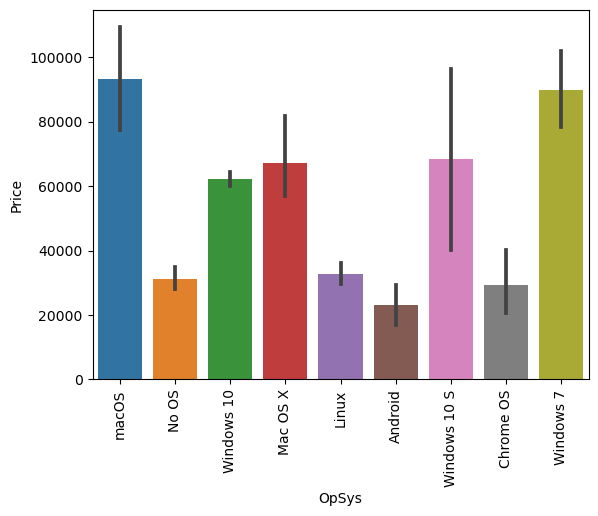

In [71]:
sns.barplot(x=laptop['OpSys'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [72]:
def cat_os(inp):
    if inp== 'Windows 10' or inp=='Windows 10 S' or inp=='Windows 7':
        return 'Windows'
    elif inp=='macOS' or inp=='Mac OS X':
        return "Mac"
    else:
        return 'Others/No OS/Linux'

In [73]:
laptop['os']=laptop['OpSys'].apply(cat_os)

C:\Users\HARRY\AppData\Local\Temp\ipykernel_20184\2630745876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop['os']=laptop['OpSys'].apply(cat_os)


In [74]:
laptop.drop(columns=['OpSys'],inplace=True)

C:\Users\HARRY\AppData\Local\Temp\ipykernel_20184\3983052306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laptop.drop(columns=['OpSys'],inplace=True)


In [75]:
laptop.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Gpu brand,Cpu brand,HDD,SSD,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel,Intel Core i5,0,128,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel,Intel Core i5,0,0,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel,Intel Core i5,0,256,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,AMD,Intel Core i7,0,512,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel,Intel Core i5,0,256,Mac


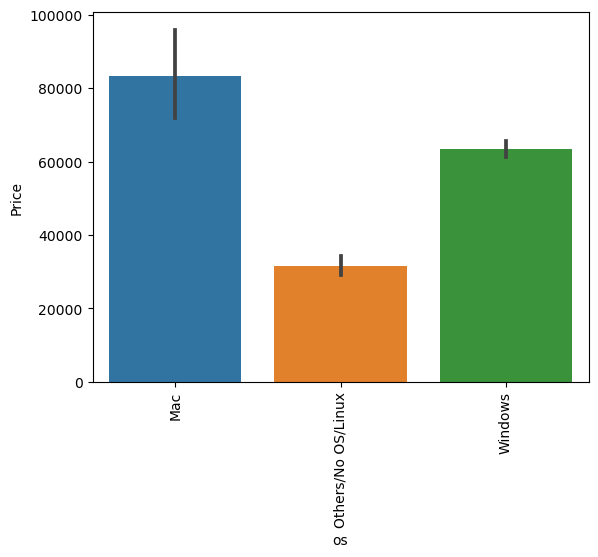

In [76]:
sns.barplot(x=laptop['os'],y=laptop['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\HARRY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

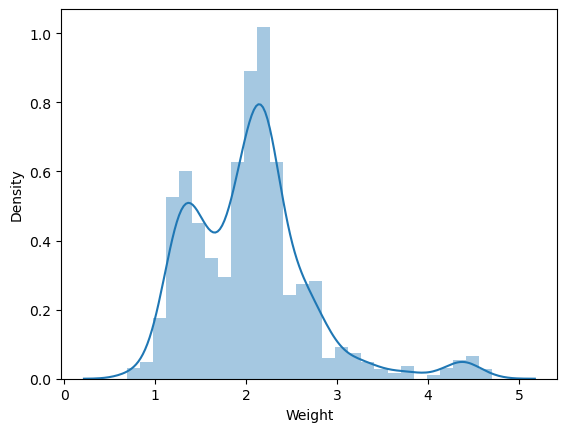

In [77]:
sns.distplot(laptop['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

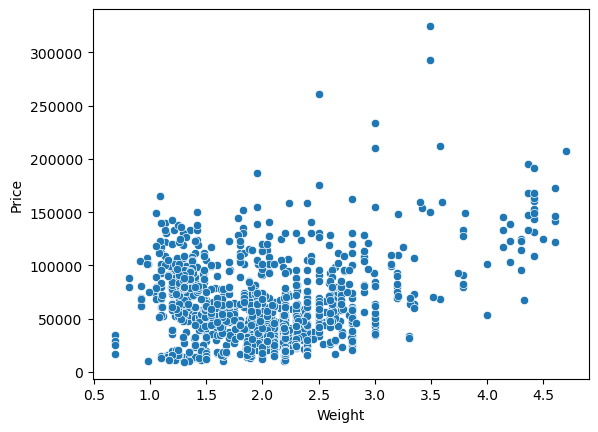

In [78]:
sns.scatterplot(x=laptop['Weight'],y=laptop['Price'])

In [79]:
laptop.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<AxesSubplot:>

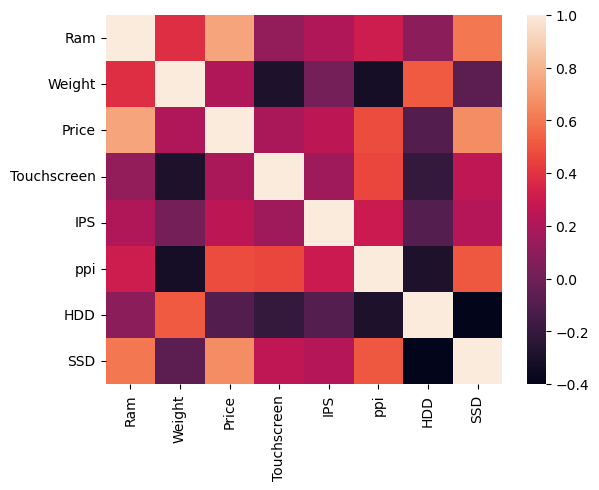

In [80]:
sns.heatmap(laptop.corr())

C:\Users\HARRY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

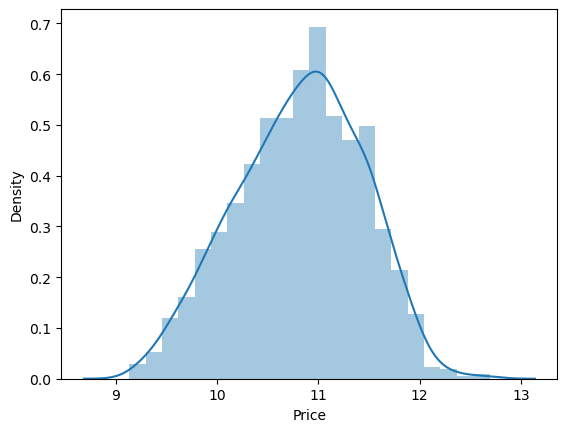

In [81]:
sns.distplot(np.log(laptop['Price']))

In [82]:
X = laptop.drop(columns=['Price'])
y = np.log(laptop['Price'])

In [83]:
X

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Gpu brand,Cpu brand,HDD,SSD,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel,Intel Core i5,0,128,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel,Intel Core i5,0,0,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel,Intel Core i5,0,256,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,AMD,Intel Core i7,0,512,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel,Intel Core i5,0,256,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel,Intel Core i7,0,128,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel,Intel Core i7,0,512,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Intel,Other Intel Processor,0,0,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,AMD,Intel Core i7,1000,0,Windows


In [84]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

# Train,Test Split

In [85]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [86]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Gpu brand,Cpu brand,HDD,SSD,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel,Intel Core i5,0,128,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Nvidia,Intel Core i7,1000,128,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Intel,Other Intel Processor,0,0,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel,Intel Core i3,1000,0,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Nvidia,Intel Core i5,1000,128,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Nvidia,Intel Core i3,500,0,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Nvidia,Intel Core i7,0,512,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD,AMD Processor,1000,0,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Nvidia,Intel Core i3,2000,0,Others/No OS/Linux


In [87]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [88]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Linear regression

In [89]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8073277448418648
MAE 0.21017827976428854


# Ridge Regression

In [90]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8127331031311809
MAE 0.20926802242582965


# Lasso Regression

In [91]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8071850663925964
MAE 0.21114351441971596


# KNN

In [92]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8021984604448553
MAE 0.19319716721521116


# DecisionTree

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

# SVM

In [93]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8083180902289917
MAE 0.2023905942719158


# Random Forest

In [102]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8845990718367212
MAE 0.1596617556124746


# ExtraTrees

In [95]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=None,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8773953634767505
MAE 0.15986803695557847


# AdaBoost

In [96]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.792102965806934
MAE 0.23103814952856552


# Gradient Boost

In [97]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8817438121131841
MAE 0.15941106464783159


# XgBoost

In [98]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8817952922286948
MAE 0.16441286858586562


# Voting Regressor

In [100]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=None,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=None,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8925355410152218
MAE 0.15583507231007715


# Stacking

In [101]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,8,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8776027024396394
MAE 0.16889067100940808


# Exporting the Model

In [104]:
import pickle

pickle.dump(laptop,open('laptop.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [103]:
laptop

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,ppi,Gpu brand,Cpu brand,HDD,SSD,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel,Intel Core i5,0,128,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel,Intel Core i5,0,0,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel,Intel Core i5,0,256,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,AMD,Intel Core i7,0,512,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel,Intel Core i5,0,256,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel,Intel Core i7,0,128,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel,Intel Core i7,0,512,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Intel,Other Intel Processor,0,0,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,AMD,Intel Core i7,1000,0,Windows
